**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

**Lectures:** [365datascience](https://learn.365datascience.com/courses/preview/machine-learning-in-python/)

# **Linear Regression Algorithm**
[Linear Regression](https://www.ibm.com/topics/linear-regression) is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

#### **Task:**   Real estate prices and size



### **Dataset available on:**

### **Imports**

In [2]:
import numpy as np # scientific computing for multidimensional array
import pandas as pd # wrangling and enchancing numpy
import scipy # scientific python
import matplotlib.pyplot as plt # visualization
import seaborn as sns # advanced statistical visuaization
sns.set() # over write the graphics of all the matplotlib plot

from sklearn.linear_model import LinearRegression # linear regression model
%matplotlib inline

#### **Read the csv file and study the database**

In [3]:
# read the data using pandas
estatePrice_df = pd.read_csv('/content/real_estate_price_size.csv')

#### **Basic EDA**

In [4]:
# display the first five rows using the head function
estatePrice_df.head(5)

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [5]:
# shape of the data
estatePrice_df.shape

(100, 2)

In [6]:
# check for missing values
estatePrice_df.isnull().sum()

price    0
size     0
dtype: int64

In [7]:
# check data types
estatePrice_df.dtypes

price    float64
size     float64
dtype: object

In [8]:
# describe stats with .describe() method
estatePrice_df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


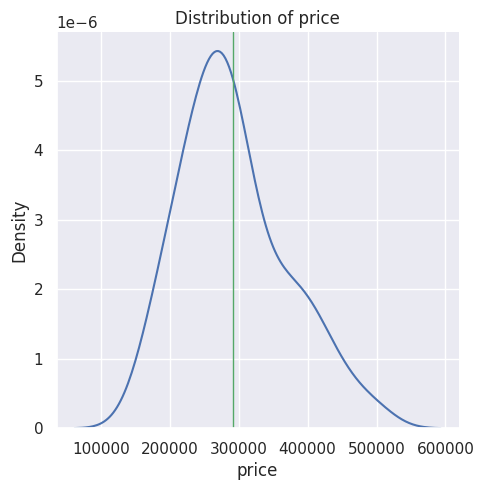

In [9]:
# plot the distribution
sns.set_theme()
sns.displot(estatePrice_df['price'], kind="kde").set(title="Distribution of price")
plt.axvline(x=estatePrice_df['price'].mean(), linewidth=1, color='g');

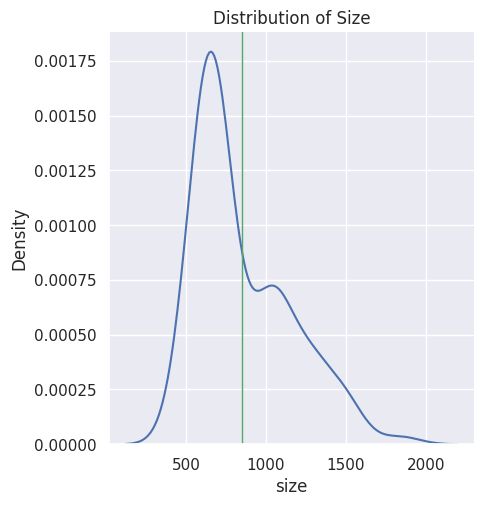

In [10]:
# plot the distribution
sns.displot(estatePrice_df['size'], kind="kde").set(title="Distribution of Size")
plt.axvline(x=estatePrice_df['size'].mean(), linewidth=1, color='g');

### **Regression model:**

#### **Define the target and the inputs**

In [11]:
input = estatePrice_df['size'] # input
target = estatePrice_df['price'] # target

#### **plot the regression line using seaborn kind="reg" data:**

Price vs Size


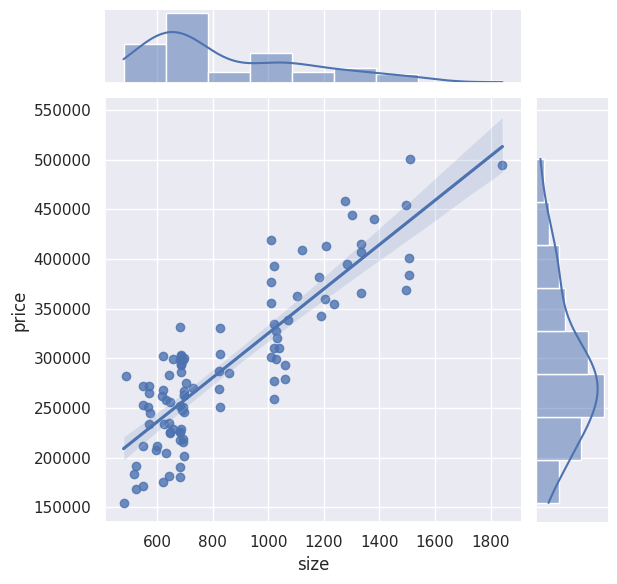

In [14]:
print("Price vs Size")
sns.jointplot(data=estatePrice_df, x='size', y="price",kind='reg');

###**Linear regression with sklearn:**

Since sklearn deals with arrays lets us see the structure of the input and target.

In [15]:
print("input shape: ",input.shape)
print("\n target shape: ",target.shape)

input shape:  (100,)

 target shape:  (100,)


### **Let's instantiate and fit the model:**

In [16]:
# the model
reg_model = LinearRegression()

**Note:** the <code>.values.reshape(-1,1)</code> has been used because since it's a simple linear regression and a vector while sklearn is expecting a two dimensional array, if you just run the <code>reg_model.fit(input,target)</code> it will throw an error. This only happens for simple linear regression.

In [17]:
# fit the model
input_matrix = input.values.reshape(-1, 1)
reg_model.fit(input_matrix , target)

LinearRegression()

#### **Parameters of sklearn LinearRegression model:**

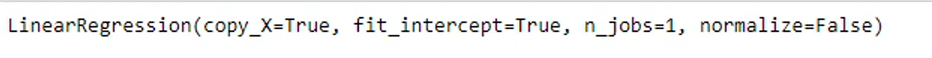

###**R-squared:**

In [18]:
# the .score method gives the R-squared value
reg_model.score(input_matrix, target)

0.7447391865847586

###**Coefficient:**

In [19]:
# the .coef_ method gives the coefficient
reg_model.coef_

array([223.17874259])

###**Intercept:**

In [20]:
# the .intercept_ method gives the intercept
reg_model.intercept_

101912.60180122897

#### **Making prediction:**

In [23]:
reg_model.predict(np.array([[800.09, 700]]).reshape(2,1))

array([280475.68196375, 258137.72161745])

In [25]:
# create a new dataFrame to feed to the algorithm
new_data = pd.DataFrame(data=[800.09, 700],columns=['size'])
new_data

,size
0,800.09
1,700.00


In [26]:
# use the model to predict a whole dataFrame
new_data['Predicted_price'] =  reg_model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
# added column
new_data

,size,Predicted_price
0,800.09,280475.681964
1,700.00,258137.721617


#### **Plot the regression line with the coefficients from the model:**

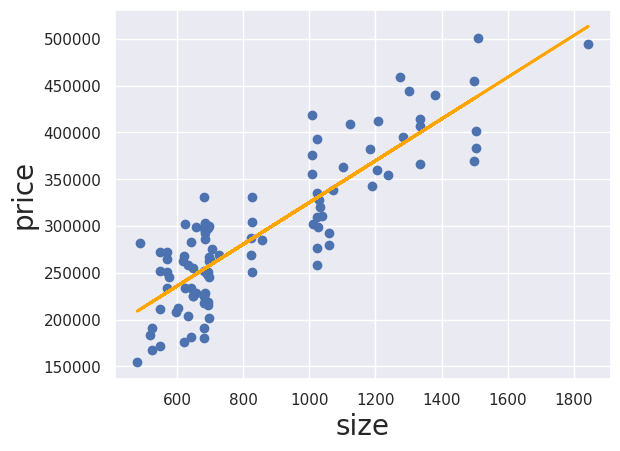

In [28]:
plt.scatter(input, target) # plot the scatter
yhat = 223.178*input + 101912.6018 # add the predicted equation
fig = plt.plot(input, yhat, lw=2, c='orange', label='regression line')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

### **Interpretation**
**regression equation:** GPA = 101912.6018 + 223.178*size

**R-squared:** the r-sqaured of the model is 0.7447

**Coefficients (coef):** The intercept is 101912.6018 and the slope is 223.178 .

### **R-squared and Adj. R-squared:**
[
**R-squared:** ](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model.


[**Adj. R-squared:**](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp) Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.


## **Now over to you use the code above to find cause and effect on a dataset you like Good Luck!!**